In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [116]:
Datadir = "./People"
CATEGORIES = ["Women_Smile","Women_Not_Smile","Man_Not_Smile","Man_Smile"]


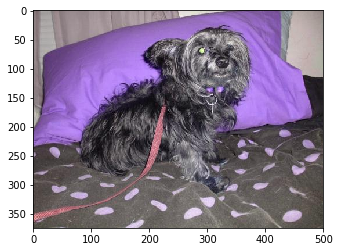

In [8]:
for categories in CATEGORIES:
    path = os.path.join(Datadir,categories)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap = "gray")
        break
    break

In [9]:
img_array.shape

(375, 500, 3)

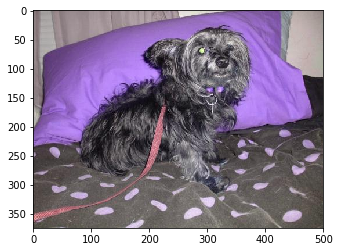

In [13]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap="gray")
new_array1 = cv2.resize(new_array, (1024,1024))
for categories in CATEGORIES:
    path = os.path.join(Datadir,categories)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap = "gray")
        break
    break

# cv2.imwrite("./dogtest/watch/100.jpg",new_array1)


In [117]:
IMG_SIZE = 100

In [41]:
new_array[0]

array([115, 160, 159, 133, 128, 131, 142, 141, 137, 138, 149, 147, 144,
       120, 142, 158, 149, 157, 160, 153, 145, 155, 118, 163, 157, 220,
       222, 221, 218, 219, 216, 178, 110, 112, 107, 122, 123, 109, 117,
       109, 106, 109, 109, 143, 151, 172, 165, 157, 148, 139], dtype=uint8)

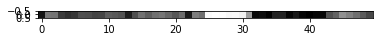

In [44]:
plt.imshow(new_array[0:1],cmap="gray")

In [14]:
training_data = []
def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(Datadir,categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [15]:
create_training_data()

In [16]:
print(len(training_data))

24946


In [59]:
for x in training_data[0:10]:
    print(x[1])

0
0
0
0
0
0
0
0
0
0


In [103]:
X = []
y = []

In [104]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [105]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (18709, 10000)
Testing Shape: (6237, 10000)


In [108]:
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (18709, 10000)
Training Data Labels Shape: (18709,)


In [109]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [110]:
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Kanwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [111]:
y_train[:20]

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [112]:
num_classes = 4
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [113]:
model = Sequential()

In [114]:
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1000100   
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
Total params: 1,010,402
Trainable params: 1,010,402
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    shuffle=True,
    verbose=2
)

Train on 22451 samples, validate on 2495 samples
22451/22451 [==============================] - 61s 3ms/sample - loss: 0.6025 - accuracy: 0.6715 - val_loss: 0.5273 - val_accuracy: 0.7495


In [35]:
model.save("Training_male_female.h5")